In [1]:
import numpy as np
import control
from pprint import pprint

import sys
sys.path.append('../')
from control_utils import *
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex

In [2]:
T = 0.01
tfinal = 0.2


   0.1 z + 0.2
-----------------
z^2 - 1.3 z + 0.5

dt = 0.01



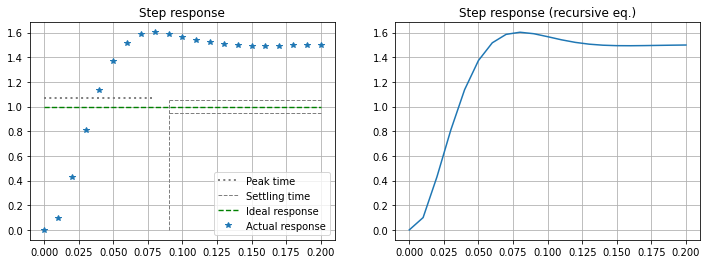

In [3]:
plt.subplots(1,2,figsize=(12,4))

plt.subplot(1,2,1)
Gz = control.tf([0.1, 0.2], [1, -1.3, 0.5], T)
step_info(Gz, tfinal)
print(Gz)

plt.subplot(1,2,2)
k_max = int(np.ceil(tfinal/T)) + 1
x = np.linspace(0, tfinal, k_max)
u = np.ones(k_max) #step
y = np.empty(k_max)
y[0] = 0
y[1] = 0.1*u[0] + 0 + 1.3*y[0] + 0
for n in range(2, k_max):
    y[n] = 0.1*u[n-1] + 0.2*u[n-2] + 1.3*y[n-1] -0.5*y[n-2]
    
plt.plot(x,y)
plt.title('Step response (recursive eq.)')
plt.grid()

In [4]:
display(Markdown('$$' + tf_reqeq_format(Gz) + '$$'))

$$y_{[n]} = +0.1 u_{[n-1]} +0.2 u_{[n-2]} +1.3y_{[n-1]} -0.5y_{[n-2]}$$

In [5]:
from typing import Callable
def tf_reqeq_build(Gz: control.xferfcn.TransferFunction) -> Callable:
    '''
    Return a function that executes one step of the recursive equation
    '''
    def f(x,y,n):
        '''
        Returns the value of y[n]
        '''
        return 0.1*x[n-1] + 0.2*x[n-2] + 1.3*y[n-1] -0.5*y[n-2]
    return f
f = tf_reqeq_build(Gz)

In [6]:
def f(x,y,n):
    '''
    Returns the value of y[n]
    x is supposed to be causal (x[i]=0 to every i<0)
    '''
    if n==1:
        return 0.1*x[n-1] + 0.2*0 + 1.3*y[n-1] -0.5*y[n-2]
    if n==2:
        return 0.1*x[n-1] + 0.2*0 + 1.3*y[n-1] -0.5*y[n-2]
    else:
        return 0.1*x[n-1] + 0.2*x[n-2] + 1.3*y[n-1] -0.5*y[n-2]

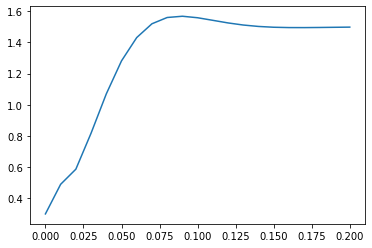

In [7]:
k_max = int(np.ceil(tfinal/T)) + 1

u2 = np.ones(k_max) #step
y2 = np.empty(k_max)
 
### Condições iniciais
y2[-1] = 0
y2[-2] = 0
###

for n in range(0, k_max):
    y2[n] = f(u2, y2, n)
plt.plot(x,y2)

In [8]:
y

array([0.        , 0.1       , 0.43      , 0.809     , 1.1367    ,
       1.37321   , 1.516823  , 1.5852649 , 1.60243287, 1.59053028,
       1.56647293, 1.54114967, 1.5202581 , 1.5057607 , 1.49735986,
       1.49368747, 1.49311378, 1.49420418, 1.49590854, 1.49757902,
       1.49889845])

In [9]:
y2

array([0.3       , 0.49      , 0.587     , 0.8181    , 1.07003   ,
       1.281989  , 1.4315707 , 1.52004741, 1.56027628, 1.56833546,
       1.55869796, 1.54213962, 1.52543252, 1.51199247, 1.50287395,
       1.4977399 , 1.4956249 , 1.49544241, 1.49626269, 1.49742029,
       1.49851503])

In [10]:
assert_almost_equal(y, y2)

AssertionError: 

In [ ]:
T = 0.01
tfinal = 0.2

plt.subplots(1,2,figsize=(12,4))

plt.subplot(1,2,1)
Gz = control.tf([1], [1, -3, 2], 0.01)
x, y = control.impulse_response(Gz, tfinal)
plt.plot(x,y)
plt.title('Impulse response')
plt.grid()
print(Gz)

plt.subplot(1,2,2)
k_max = int(np.ceil(tfinal/T)) + 1
x = np.linspace(0, tfinal, k_max)
u = np.zeros(k_max) #impulse
u[0] = 1
y = np.empty(k_max)
y[0] = 0
y[1] = 0.1*0 + 3*y[0] -2*0
for n in range(2, k_max):
    y[n] = 0.1*u[n-2] + 3*y[n-1] -2*y[n-2]
    
plt.plot(x,y)
plt.title('Impulse response (recursive eq.)')
plt.grid()

In [ ]:
T = 0.1
tfinal = 1

plt.subplots(1,2,figsize=(12,4))

plt.subplot(1,2,1)
Gz = control.tf([1, 0], [3, 2], T)
x, y = control.step_response(Gz, tfinal)
plt.plot(x,y)
plt.title('Step response')
plt.grid()
print(Gz)

plt.subplot(1,2,2)
k_max = int(np.ceil(tfinal/T)) + 1
x = np.linspace(0, tfinal, k_max)
u = np.ones(k_max) #step
y = np.empty(k_max)
y[0] = 1/3*u[0]
for n in range(1, k_max):
    y[n] = 1/3*u[n] -2/3*y[n-1]
    
plt.plot(x,y)
plt.title('Impulse response (recursive eq.)')
plt.grid()